In [55]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
file_list

['P19NT_10_htseq_count.txt',
 'SampleTable.xlsx',
 'P19NT_19_htseq_count.txt',
 'P19NT_2_htseq_count.txt',
 'P19NT_20_htseq_count.txt',
 'SampleTable_1.xlsx',
 'P19NT_24_htseq_count.txt',
 'P19NT_5_htseq_count.txt',
 'P19NT_1_htseq_count.txt',
 'P19NT_11_htseq_count.txt',
 'P19NT_15_htseq_count.txt',
 'P19NT_7_htseq_count.txt',
 'P19NT_9_htseq_count.txt',
 'P19NT_4_htseq_count.txt',
 'P19NT_18_htseq_count.txt',
 'P19NT_27_htseq_count.txt',
 'P19NT_3_htseq_count.txt',
 'P19NT_14_htseq_count.txt',
 'P19NT_8_htseq_count.txt',
 'P19NT_23_htseq_count.txt',
 'P19NT_22_htseq_count.txt',
 'P19NT_6_htseq_count.txt']

In [44]:
file_list = os.listdir(file_path)

In [35]:
file_path = '/data02/qzhou/data/LMD/RNAseq/20191213/wkdir/Count/'
filename = 'P19NT_10_htseq_count.txt'

In [ ]:
for filename in file_list:
    if filename.split('.')[-1]!='txt':
        continue
    

In [51]:
def get_anno_ratio(filename,file_path='/data02/qzhou/data/LMD/RNAseq/20191213/wkdir/Count/'):
    col2_list = []
    col3_list = []
    nonannoted_count = 0
    with open(file_path+filename,'r') as f:
        for line in f:
            line = str.strip(line)
            line_sp = line.split('\t')
            if line_sp[0]=='__no_feature':
                nonannoted_count = int(line_sp[-1])
            if line[0] == '_':
                continue
           
    #         print(line_sp[0],line_sp[1],line_sp[2])
            col2_list.append(line_sp[1])
            col3_list.append(int(line_sp[2]))
    col3_list_np = np.array(col3_list)    
    annoted_count = col3_list_np.sum()
    return annoted_count,nonannoted_count,annoted_count/(annoted_count+nonannoted_count)
    

In [52]:
get_anno_ratio(file_list[0],file_path='/data02/qzhou/data/LMD/RNAseq/20191213/wkdir/Count/')

(3578268, 6230784, 0.3647924386576807)

In [53]:
nonannoted_list = []
annoted_list = []
ratio_list = []
valid_filename_list = []
for filename in file_list:
    if filename.split('.')[-1]!='txt':
        continue 
    annoted_count,nonannoted_count,ratio = get_anno_ratio(filename)
    nonannoted_list.append(nonannoted_count)
    annoted_list.append(annoted_count)
    ratio_list.append(ratio)
    valid_filename_list.append(filename)

<BarContainer object of 20 artists>

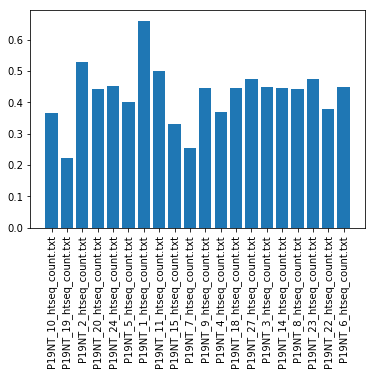

In [59]:
plt.xticks(rotation='vertical')
plt.bar(x=valid_filename_list,height=ratio_list)

In [69]:
def get_unique_genename_file(filename,file_path='/data02/qzhou/data/LMD/RNAseq/20191213/wkdir/Count/'):
    col2_list = []
    col3_list = []
    file_tail =''
    nonannoted_count = 0
    with open(file_path+filename,'r') as f:
        for line in f:
            
            
            if line[0] == '_':
                file_tail+=line
                continue
            line = str.strip(line)
            line_sp = line.split('\t')
    #         print(line_sp[0],line_sp[1],line_sp[2])
            col2_list.append(line_sp[1])
            col3_list.append(int(line_sp[2]))
    col2_list_np = np.array(col2_list)
    col3_list_np = np.array(col3_list)    
    unique_gene_name,unique_count = np.unique(col2_list_np,return_counts=1)
    
    unique_gene_count = np.zeros_like(unique_gene_name)
    
    for i in range(unique_gene_name.shape[0]):
        unique_col2 = unique_gene_name[i]
        idx_array = np.where(col2_list_np==unique_col2)[0]
        cur_count = col3_list_np[idx_array].sum()
        unique_gene_count[i] = cur_count
    return unique_gene_name,unique_gene_count
    

In [98]:
def get_unique_genename_file(filename,file_path='/data02/qzhou/data/LMD/RNAseq/20191213/wkdir/Count/'):
#     filename = file_list[0]
    col2_list = []
    col3_list = []
    file_tail =''
    nonannoted_count = 0
    with open(file_path+filename,'r') as f:
        for line in f:


            if line[0] == '_':
                file_tail+=line
                continue
            line = str.strip(line)
            line_sp = line.split('\t')
    #         print(line_sp[0],line_sp[1],line_sp[2])
            col2_list.append(line_sp[1])
            col3_list.append(int(line_sp[2]))
    col2_list_np = np.array(col2_list)
    col3_list_np = np.array(col3_list)    
    unique_gene_name,unique_count = np.unique(col2_list_np,return_counts=1)

    unique_gene_count = np.zeros(shape=unique_gene_name.shape)

    for i in range(unique_gene_name.shape[0]):
        unique_col2 = unique_gene_name[i]
        idx_array = np.where(col2_list_np==unique_col2)[0]
        cur_count = col3_list_np[idx_array].sum()
        unique_gene_count[i] = cur_count
    # return unique_gene_name,unique_gene_count

    with open(file_path+filename+'.unique','w') as f:
        num_unique_genes = unique_gene_name.shape[0]
        for i in range(num_unique_genes):
            to_write = unique_gene_name[i]+'\t'+str(unique_gene_count[i])+'\n'
            f.write(to_write)
        f.write(file_tail)
    return num_unique_genes

In [99]:
n_unique_genes = get_unique_genename_file(file_list[2],file_path='/data02/qzhou/data/LMD/RNAseq/20191213/wkdir/Count/')

In [101]:
n_unique_genes_list = []
for filename in file_list:
    if filename.split('.')[-1]!='txt':
        continue 
    n_unique_genes = get_unique_genename_file(filename,file_path='/data02/qzhou/data/LMD/RNAseq/20191213/wkdir/Count/')
    print(filename,n_unique_genes)
    n_unique_genes_list.append(n_unique_genes)

P19NT_10_htseq_count.txt 59368
P19NT_19_htseq_count.txt 59368
P19NT_2_htseq_count.txt 59368
P19NT_20_htseq_count.txt 59368
P19NT_24_htseq_count.txt 59368
P19NT_5_htseq_count.txt 59368
P19NT_1_htseq_count.txt 59368
P19NT_11_htseq_count.txt 59368
P19NT_15_htseq_count.txt 59368
P19NT_7_htseq_count.txt 59368
P19NT_9_htseq_count.txt 59368
P19NT_4_htseq_count.txt 59368
P19NT_18_htseq_count.txt 59368
P19NT_27_htseq_count.txt 59368
P19NT_3_htseq_count.txt 59368
P19NT_14_htseq_count.txt 59368
P19NT_8_htseq_count.txt 59368
P19NT_23_htseq_count.txt 59368
P19NT_22_htseq_count.txt 59368
P19NT_6_htseq_count.txt 59368


In [100]:
n_unique_genes

59368

In [82]:
Y_RNA_idx = np.where(col2_list_np=='Y_RNA')[0]


In [88]:
Y_RNA_idx.shape

(756,)

In [89]:
col3_list_np[Y_RNA_idx].sum()

65

In [85]:
Y_RNA_unique_idx = np.where(unique_gene_name=='Y_RNA')[0]

In [90]:
unique_gene_count[Y_RNA_unique_idx]

array([65.])

In [70]:
unique_gene_name,unique_gene_count=get_unique_genename_file(file_list[0],file_path='/data02/qzhou/data/LMD/RNAseq/20191213/wkdir/Count/')

In [71]:
unique_gene_name.shape

(59368,)

In [74]:
unique_gene_count

array(['0', '1', '0', ..., '0', '0', '0'], dtype='<U25')

In [37]:
col2_list_np = np.array(col2_list)
col3_list_np = np.array(col3_list)

In [68]:
a = np.array([1,3,5,3])
np.where(a==3)[0]

array([1, 3])

In [17]:
unique_gene_name,unique_count = np.unique(col2_list_np,return_counts=1)

In [18]:
unique_gene_name.shape

(59368,)

In [21]:
uc_argsort = np.argsort(unique_count)

In [22]:
uc_argsort_flip = np.flip(uc_argsort)

In [23]:
unique_gene_name[uc_argsort_flip]

array(['Y_RNA', 'Metazoa_SRP', 'U3', ..., 'MIR935', 'MIR934', 'FSD2'],
      dtype='<U25')

In [31]:
Y_RNA_idx = np.where(unique_gene_name=='Y_RNA')[0][0]

In [32]:
unique_count[Y_RNA_idx]

756

np.argsort(a)

#### fuck 